In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from utils_ml import *
import itertools
import time
import matplotlib.pyplot as plt
from copy import deepcopy
import pickle


timestamp = str(time.time()).split('.')[0]

critere = 'shap'
target_name ='pm_post_TAVI'
normalize_type = 'standard'
cut_outliers_bool = False
impute_missing = 'median'
model_name_ = 'svc'
per_post_pre = None
morpho = 'proced'
type_resampling = 'smote'

best_var = ['marque_ACURATE', 'taille_valve_26', 'marque_EDWARDS', 'modele_EVOLUT_R', 'taille_valve_29', 'marque_COREVALVE', 'oversizing_4', 'nominal']
target = ['pm_post_TAVI','tbc_haut_grade_post_tavi']
cols_df = ['critere','target_name','normalize_type','cut_outliers_bool','impute_missing','model_name_','per_post_pre','remove','type_resampling',
           'auc','std','acc','f1','cols','stats','confs']
res = pd.DataFrame(columns= cols_df )
critere = None
df = pd.read_csv('data/dataset_train_all_extand.csv')
to_rescale = ['diff_MS','MS_d','delta_msid_d','euroscore_logistique','creatinine_lors_inclusion','clairance','poids','taille','imc','pr_pre_tavi','pr_j0','qrs_pre_tavi','qrs_j0','gradient_moyen_pre_tavi','surface_valvulaire_pre_tavi','fraction_ejection_pretavi','valeur_paps','diametre_anneau_retenue','petit_diametre_anneau','grand_diametre_anneau','surface_diastole','surface_systole','score_calcique','MS_s','nombre_cardiologues_interventionnels','nombre_chirurgiens','nb_valve_implantée','prof_impl_valv','delta_msid','gradient_moyen_post_tavi','surface_valvulaire_post_tavi','fraction_ejection_post_tavi','valeur_paps_post','nominal','oversizing','delta_pr','delta_qrs','age','oversizing_2','oversizing_3','oversizing_4','AVA_ratio','AVA_PNA_pre_ratio','AVA_PNA_post_ratio','ncc_calcif_n','lcc_calc_n','rcc_calc_n','calc_septum_n','calc_risque_n']
categoric = ['calc_risque','sexe','bioprothese_aortique','type_bioprothese','pontage_coronaire','angioplastie_coronaire','sca_inf_100j','insuffisance_respiratoire','aomi','ait_avc','diabete','si_oui_insuline','insuffisance_renale_chronique','anticoagulant_pretavi','dyspnee','si_oui_nyha','plus_de_deux_OAP_past_two_y','angor_classe_quatre','syncope','tsv_pretavi','bav1_pretavi','tsv_post','fuite_aortique_pretavi','fuite_mitrale_pretavi','calcif_tiers_sup_aorte','ncc_calcif','lcc_calc','rcc_calc','calc_septum','lvot_calc','localisation','abord','marque','modele','taille_valve','predilatation','postdilatation','fuite_aortique','localisation_fuite','fuite_mitrale','bloc_branche_pre','bloc_branche_post','nyha34']
to_encode = ['calc_risque_0.0', 'calc_risque_1.0', 'calc_risque_2.0', 'calc_risque_3.0', 'calc_risque_4.0', 'calc_risque_5.0', 'calc_risque_6.0', 'calc_risque_7.0', 'calc_risque_nan', 'sexe_Femme', 'sexe_Homme', 'bioprothese_aortique_Non', 'bioprothese_aortique_Oui', 'type_bioprothese_Edwards_Magna_Ease_23', 'type_bioprothese_Edwards_Magna_Ease_25', 'type_bioprothese_Medtronic_Mosaic_21', 'type_bioprothese_Medtronic_Mosaic_23', 'type_bioprothese_Sorin_Mitroflow_21', 'type_bioprothese_Sorin_Mitroflow_23', 'type_bioprothese_Sorin_Mitroflow_23 ', 'type_bioprothese_St_Jude_Trifecta_19', 'type_bioprothese_St_Jude_Trifecta_21', 'type_bioprothese_St_Jude_Trifecta_23', 'type_bioprothese_St_Jude_Trifecta_25', 'type_bioprothese_St_Jude_trifecta_25', 'type_bioprothese_nan', 'pontage_coronaire_Non', 'pontage_coronaire_Oui', 'angioplastie_coronaire_Non', 'angioplastie_coronaire_Oui', 'sca_inf_100j_Non', 'sca_inf_100j_Oui', 'insuffisance_respiratoire_Non', 'insuffisance_respiratoire_Oui', 'aomi_Non', 'aomi_Oui', 'ait_avc_Non', 'ait_avc_Oui', 'diabete_Non', 'diabete_Oui', 'si_oui_insuline_Non', 'si_oui_insuline_Oui', 'si_oui_insuline_nan', 'insuffisance_renale_chronique_3', 'insuffisance_renale_chronique_4', 'insuffisance_renale_chronique_5', 'insuffisance_renale_chronique_Non', 'anticoagulant_pretavi_Non', 'anticoagulant_pretavi_Oui', 'dyspnee_Non', 'dyspnee_Oui', 'si_oui_nyha_I', 'si_oui_nyha_II', 'si_oui_nyha_III', 'si_oui_nyha_IV', 'plus_de_deux_OAP_past_two_y_Non', 'plus_de_deux_OAP_past_two_y_Oui', 'angor_classe_quatre_Non', 'angor_classe_quatre_Oui', 'syncope_Non', 'syncope_Oui', 'tsv_pretavi_Non', 'tsv_pretavi_Oui', 'bav1_pretavi_Non', 'bav1_pretavi_Oui', 'tsv_post_Non', 'tsv_post_Oui', 'fuite_aortique_pretavi_0', 'fuite_aortique_pretavi_Grade 1', 'fuite_aortique_pretavi_Grade 2', 'fuite_aortique_pretavi_Grade 3', 'fuite_aortique_pretavi_Grade 4', 'fuite_aortique_pretavi_nan', 'fuite_mitrale_pretavi_Aucune', 'fuite_mitrale_pretavi_Grade 1', 'fuite_mitrale_pretavi_Grade 2', 'fuite_mitrale_pretavi_Grade 3', 'fuite_mitrale_pretavi_Grade 4', 'fuite_mitrale_pretavi_nan', 'calcif_tiers_sup_aorte_0', 'calcif_tiers_sup_aorte_1', 'ncc_calcif_0.0', 'ncc_calcif_1.0', 'ncc_calcif_2.0', 'ncc_calcif_3.0', 'ncc_calcif_nan', 'lcc_calc_0.0', 'lcc_calc_1.0', 'lcc_calc_2.0', 'lcc_calc_3.0', 'lcc_calc_nan', 'rcc_calc_0.0', 'rcc_calc_1.0', 'rcc_calc_2.0', 'rcc_calc_3.0', 'rcc_calc_nan', 'calc_septum_0.0', 'calc_septum_1.0', 'calc_septum_nan', 'lvot_calc_0.0', 'lvot_calc_1.0', 'lvot_calc_nan', 'localisation_Bloc opératoire', 'localisation_Cardio interventionnelle', 'localisation_Salle hybride', 'localisation_nan', 'abord_Carotidien', 'abord_Ilio fémoral', 'abord_Trans aortique', 'abord_Transapical', 'marque_ACURATE', 'marque_COREVALVE', 'marque_EDWARDS', 'marque_ST_JUDE', 'modele_EVOLUT_PRO', 'modele_EVOLUT_R', 'modele_NEO_L', 'modele_NEO_M', 'modele_NEO_S', 'modele_PORTICO', 'modele_SAPIEN_III', 'taille_valve_23', 'taille_valve_25', 'taille_valve_26', 'taille_valve_27', 'taille_valve_29', 'taille_valve_34', 'predilatation_0', 'predilatation_1', 'postdilatation_0', 'postdilatation_1', 'fuite_aortique_Aucune', 'fuite_aortique_Grade 1', 'fuite_aortique_Grade 2', 'fuite_aortique_Grade 3', 'fuite_aortique_Grade 4', 'fuite_aortique_nan', 'localisation_fuite_Centrale', 'localisation_fuite_Centrale et péri-prothétique', 'localisation_fuite_Péri-prothétique', 'localisation_fuite_nan', 'fuite_mitrale_Aucune', 'fuite_mitrale_Grade 1', 'fuite_mitrale_Grade 2', 'fuite_mitrale_Grade 3', 'fuite_mitrale_Grade 4', 'fuite_mitrale_nan', 'bloc_branche_pre_bbd', 'bloc_branche_pre_bbg', 'bloc_branche_pre_non', 'bloc_branche_post_bbd', 'bloc_branche_post_bbg', 'bloc_branche_post_non', 'nyha34_0', 'nyha34_1']
#variable selection
to_rescale = [x for x in to_rescale if x in best_var]
to_encode = [x for x in to_encode if x in best_var]
#train 
resultats = train_model(df,to_rescale,to_encode,target_name,normalize_type,cut_outliers_bool,
            impute_missing,model_name_,per_post_pre,morpho,type_resampling,
                   n_runs=10,n_folds=10,n_folds_cv=10,curves=True,run_shap=True)
#balanced_accuracy_list,accuracy_list,f1_list,auc_list,precision_list,recall_list,matrix_conf_list = resultats
#balanced_accuracy_list,accuracy_list,f1_list,auc_list,precision_list,recall_list,matrix_conf_list,mean_rec,mean_prec,rec_list,prec_list,AP,std_prec,prec_upper,prec_lower,mean_tprs_array,mean_tprs_list,base_fpr,tprs_lower,tprs_upper=resultats
balanced_accuracy_list,accuracy_list,f1_list,auc_list,precision_list,recall_list,matrix_conf_list,mean_rec,mean_prec,rec_list,prec_list,AP,std_prec,prec_upper,prec_lower,mean_tprs_array,mean_tprs_list,base_fpr,tprs_lower,tprs_upper,list_df_shap=resultats
auc,std,acc,f1 = np.mean(auc_list),np.std(auc_list),np.mean(accuracy_list),np.mean(f1_list)
print('auc, acc, f1 : ',round(auc*100,1),round(acc*100,1),round(f1*100,1))
stats = (run_stats(balanced_accuracy_list),run_stats(accuracy_list),run_stats(f1_list),
         run_stats(auc_list),run_stats(precision_list),run_stats(recall_list))
res_dict = {'critere':critere,'target_name':target_name,'normalize_type':normalize_type,'cut_outliers_bool':cut_outliers_bool,'impute_missing':impute_missing,'model_name_':model_name_,'per_post_pre':per_post_pre,'remove':morpho,'type_resampling':type_resampling,
            'auc':auc,'std':std,'acc':acc,'f1':f1,'cols':best_var,'stats':stats,'confs':np.sum(matrix_conf_list,axis=0)}

res = pd.concat([res, pd.DataFrame.from_records([res_dict])],ignore_index=True)
#with open('pickle_resultats/post_'+model_name_+'_pickle', 'wb') as handle:
#    pickle.dump(resultats, handle, protocol=pickle.HIGHEST_PROTOCOL)
#res.to_csv('resultats/validmodel_'+timestamp+'_resultats_model.csv',index=False)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


auc, acc, f1 :  61.7 59.2 32.4


In [5]:
with open('pickle_resultats/proced_pickle', 'wb') as handle:
    pickle.dump(resultats, handle, protocol=pickle.HIGHEST_PROTOCOL)

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


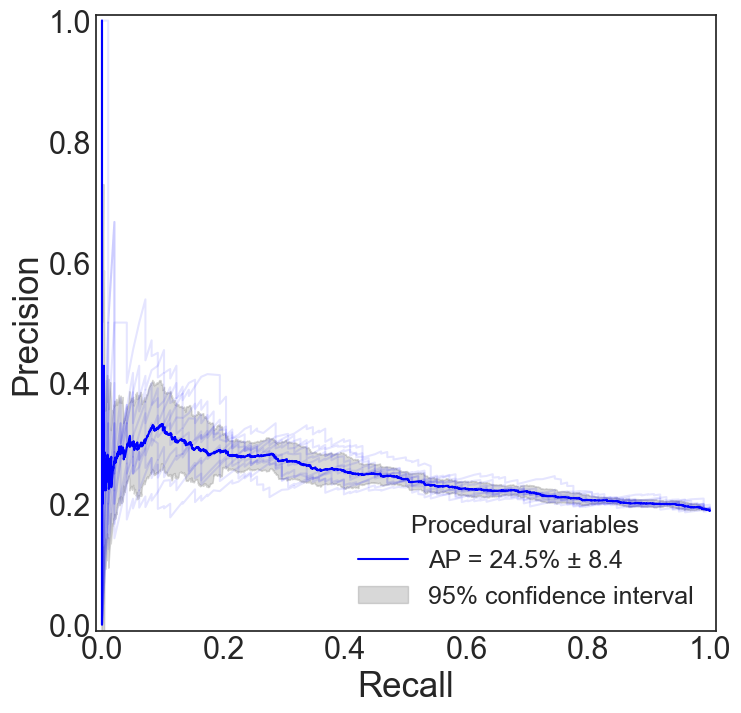

In [6]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8,8))
for r,p in zip(rec_list,prec_list):
    plt.plot(r,p,'b', alpha=0.10)
    
plt.plot( mean_rec,mean_prec,'b',label='AP = '+str(round(AP*100,1))+'% ± ' + str(round(np.std(f1_list)*100,1)))
plt.fill_between(mean_rec, prec_lower, prec_upper, color='grey', alpha=0.3,label='95% confidence interval')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.legend(loc = 'lower right',fontsize=18,title='Procedural variables',title_fontsize=18)
plt.ylabel('Precision',fontsize=25)
plt.xlabel('Recall',fontsize=25)
plt.xticks(fontsize= 22 )
plt.yticks(fontsize= 22 )

plt.savefig('figures_paper/prrec_proced.tiff',bbox_inches = 'tight',dpi=300)
plt.savefig('figures_paper/prrec_proced.png',bbox_inches = 'tight',dpi=300)


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


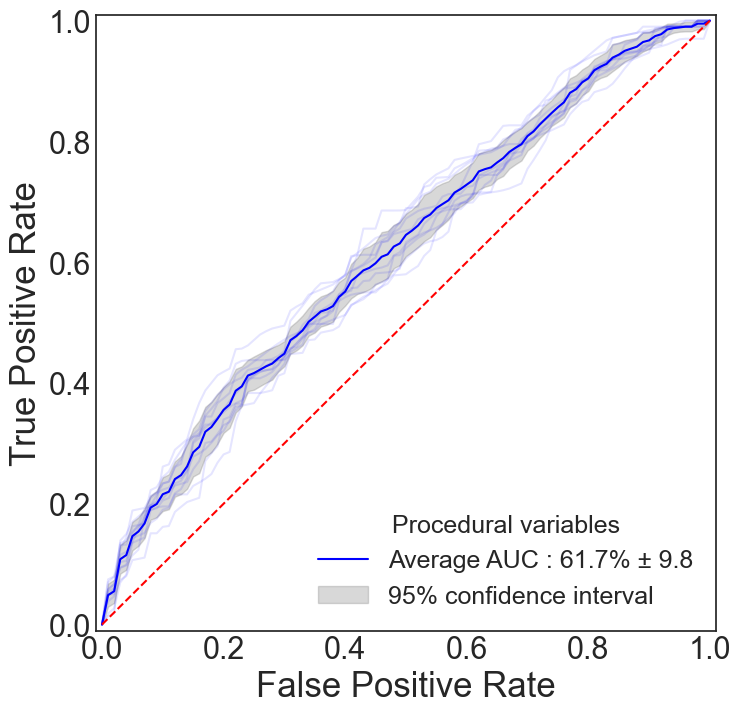

In [7]:
plt.style.use('seaborn-white')
plt.figure(figsize=(8,8))
for m_t in mean_tprs_list:
    plt.plot(base_fpr, m_t, 'b', alpha=0.10)
plt.plot(base_fpr, mean_tprs_array, 'b',label='Average AUC : '+str(round(np.mean(auc_list)*100,1))+'% ± ' + str(round(np.std(auc_list)*100,1)))
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3,label='95% confidence interval')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.legend(loc = 'lower right',fontsize=18,title='Procedural variables',title_fontsize=18)
plt.ylabel('True Positive Rate',fontsize=25)
plt.xlabel('False Positive Rate',fontsize=25)
plt.xticks(fontsize= 22 )
plt.yticks(fontsize= 22 )
plt.savefig('figures_paper/auroc_proced.tiff',bbox_inches = 'tight',dpi=300)
plt.savefig('figures_paper/auroc_proced.png',bbox_inches = 'tight',dpi=300)


In [10]:
from utils_ml import *


<Figure size 800x800 with 0 Axes>

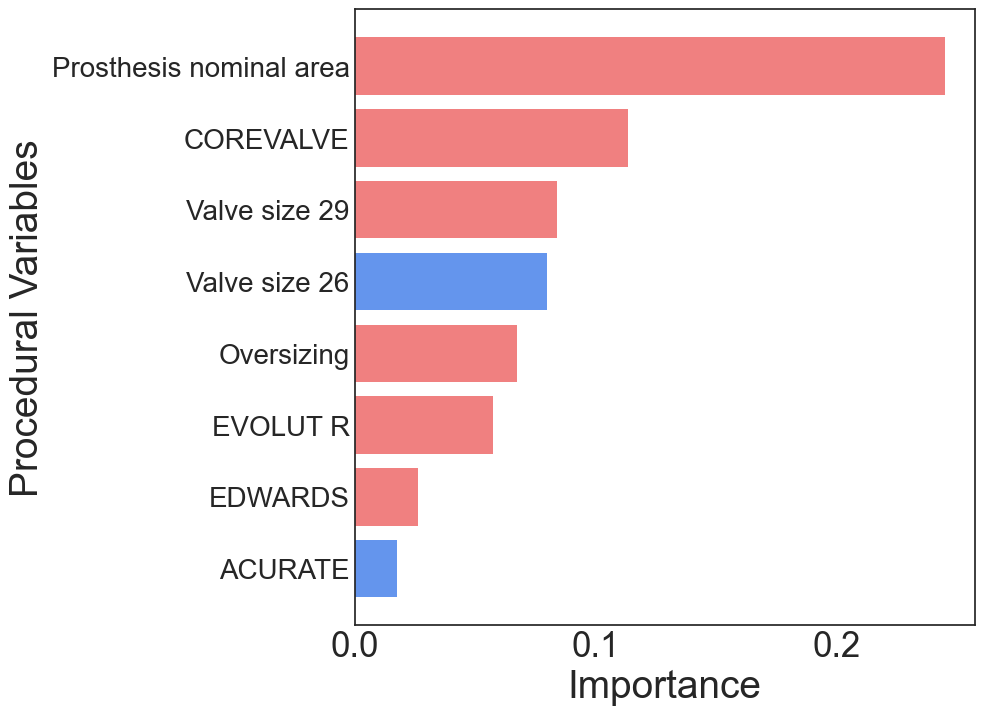

In [11]:
df_final_shap = pd.concat(list_df_shap,ignore_index=True).abs().mean().sort_values(ascending=True)

stats_df = pd.concat([pd.read_csv('stats/stats_cont_format.csv'),pd.read_csv('stats/stats_categ_format.csv')],ignore_index=True)
colors =[]
for coli in df_final_shap.index.tolist():
    if stats_df[stats_df['variable']==coli]['r'].values[0]>0:
        colors.append('lightcoral')
    else : 
        colors.append('cornflowerblue')
        plt.figure(figsize=(8,8))
plt.barh([dict_rename[c] for c in df_final_shap.index ] ,df_final_shap.values, color=colors)
plt.ylabel('Procedural Variables',fontsize=28)
plt.xlabel('Importance',fontsize=28)
plt.xticks(fontsize= 25 )
plt.yticks(fontsize= 25 )
plt.locator_params(axis='x', nbins=5)
plt.yticks(fontsize=20)
plt.savefig('figures_paper/shap_proced.tiff',bbox_inches = 'tight',dpi=300)
plt.savefig('figures_paper/shap_proced.png',bbox_inches = 'tight',dpi=300)

In [16]:
df_final_shap

marque_EDWARDS      0.030994
marque_ACURATE      0.031900
oversizing          0.036818
taille_valve_29     0.055117
oversizing_2        0.057060
taille_valve_26     0.065876
marque_COREVALVE    0.067863
oversizing_4        0.074907
modele_EVOLUT_R     0.081981
nominal             0.310085
dtype: float64

In [15]:
def print_metrics(balanced_accuracy_list,accuracy_list,f1_list,auc_list,precision_list,recall_list,matrix_conf_list):
    print('Balanced accuracy', np.round(np.mean(balanced_accuracy_list)*100,1),  np.round(np.std(balanced_accuracy_list)*100,1))
    print('Accuracy', np.round(np.mean(accuracy_list)*100,1),  np.round(np.std(accuracy_list)*100,1))
    print('F1', np.round(np.mean(f1_list)*100,1),  np.round(np.std(f1_list)*100,1))
    print('AUC', np.round(np.mean(auc_list)*100,1),  np.round(np.std(auc_list)*100,1))
    print('Precision', np.round(np.mean(precision_list)*100,1),  np.round(np.std(precision_list)*100,1))
    print('Recall', np.round(np.mean(recall_list)*100,1),  np.round(np.std(recall_list)*100,1))
    print('confusion matrix')
    print(np.sum(matrix_conf_list,axis=0))
print_metrics(balanced_accuracy_list,accuracy_list,f1_list,auc_list,precision_list,recall_list,matrix_conf_list)

Balanced accuracy 56.4 8.2
Accuracy 59.2 9.7
F1 32.4 8.4
AUC 61.7 9.8
Precision 24.1 6.5
Recall 52.0 17.0
confusion matrix
[[2567 1653]
 [ 470  510]]
